Download the dataset and load the data of red wines.

In [1]:
from pathlib import Path
import pandas as pd
import zipfile
import urllib.request

def load_wine_data():
    zip_file_path = Path("datasets/wine+quality.zip")
    if not zip_file_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
        urllib.request.urlretrieve(url, zip_file_path)
        with zipfile.ZipFile(zip_file_path) as zip_wine:
            zip_wine.extractall(path='datasets')
    return pd.read_csv(Path("datasets/winequality-red.csv"), sep=';')

wine = load_wine_data()

Print the first rows to visualize the data.

In [2]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The features that describe the quality of wines are : 
*  fixed acidity
*  volatile acidity
*  citric acid
*  residual sugar
*  chlorides
*  free sulfur dioxide
*  total sulfur dioxide
*  density
*  pH
*  suplhates
*  alcohol

And some additional information.

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All categories are float, except from "quality" that is an integer.
<br>
None of the categories have a a missing value, since all of them have 1599 entries.

Compute the descriptive statistics of the dataset features.

In [6]:
stats = wine.describe()
print("The descriptive statistics of the features are:")
print(stats)

The descriptive statistics of the features are:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   


In [9]:
stats_cols = list(stats.columns.values)
print("The range of each feature is:")
print("-------------------------------------")
for colname in stats_cols:
    print(f"The range of {colname} is : {stats.loc['max' , colname] - stats.loc['min' , colname]}")

The range of each feature is:
-------------------------------------
The range of fixed acidity is : 11.3
The range of volatile acidity is : 1.46
The range of citric acid is : 1.0
The range of residual sugar is : 14.6
The range of chlorides is : 0.599
The range of free sulfur dioxide is : 71.0
The range of total sulfur dioxide is : 283.0
The range of density is : 0.013619999999999965
The range of pH is : 1.2699999999999996
The range of sulphates is : 1.67
The range of alcohol is : 6.5
The range of quality is : 5.0


Plot the histograms of the features.

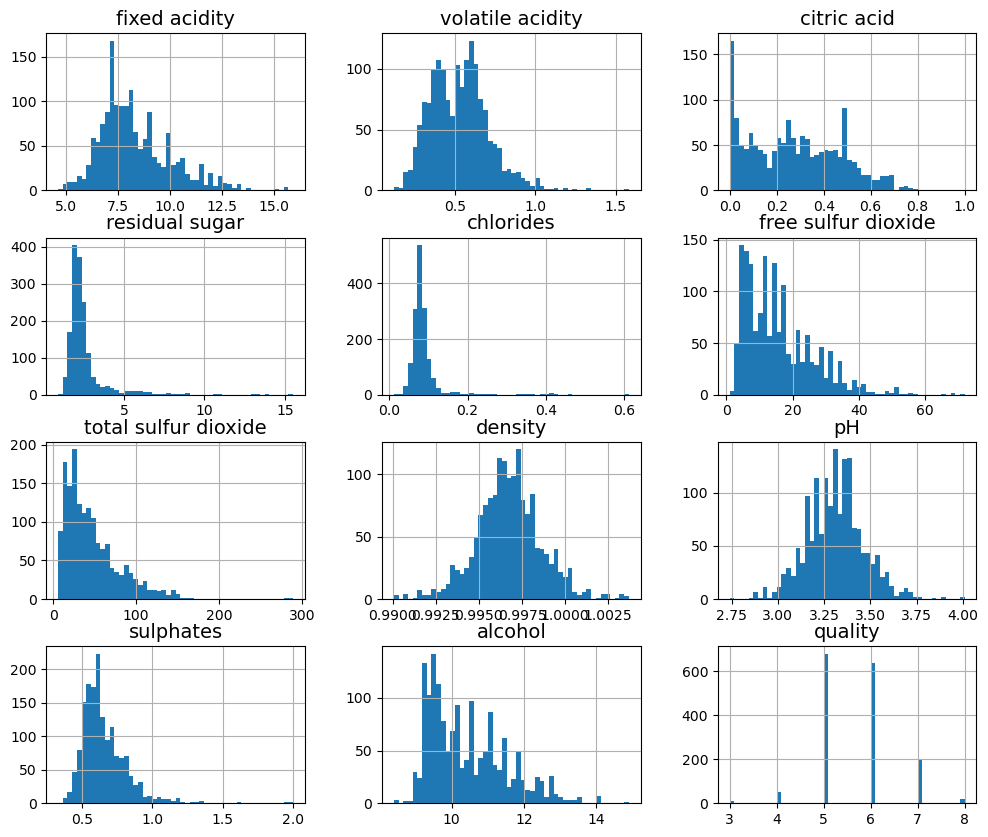

In [10]:
#plot the histograms of the features
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

wine.hist(bins=50, figsize=(12, 10))
plt.show()

Apart from "density" , "pH" and "quality", the rest distributions are skewed right.
<br>
The above distributions can be improved by applying the log transform.

Check what features affect most the quality.

In [11]:
#Calculate the correlation matrix
corr_matrix = wine.corr()

#sort the correlation between quality and other features in descending order 
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

The quality is affected mostly by alcohol (positive), suplhates (positive) and volatile acidity (negative) and less by residual sugar, free sulfur dioxide and pH.

Split the dataset into stratified training and test sets with a 80% - 20% ratio.

In [12]:
#Split the data into train and test set with a 80-20 ratio
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(wine, test_size=0.2, stratify=wine["quality"], random_state=42)

Scale the data using a standard scaler and train a linear regression model.

In [13]:
#Separate the target on the train set

#wine = strat_train_set.copy()   xreiazetai antigrafo edo?

wine = strat_train_set.drop("quality", axis=1)
wine_labels = strat_train_set["quality"].copy()

from sklearn.preprocessing import StandardScaler

#Scale the data with Standard Scaler
std_scaler = StandardScaler()
wine_std_scaled = std_scaler.fit_transform(wine)

#Train a regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(wine, wine_labels)

LinearRegression()

In [14]:
#Separate the target on the test set
X_test = strat_test_set.drop("quality", axis=1)
y_test = strat_test_set["quality"].copy()

#Make predictions
final_predictions = model.predict(X_test)

Calculate some basic metrics to evaluate the model.

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
 
#calculate the metrics
final_r2 = r2_score(y_test, final_predictions)
final_mae = mean_absolute_error(y_test, final_predictions)
final_mape = mean_absolute_percentage_error(y_test, final_predictions)
final_mse = mean_squared_error(y_test, final_predictions)

print("Evaluation metrics of the model:")
print(f"R^2-score : {final_r2}")
print(f"Mean Absolute Error : {final_mae}")
print(f"Mean Absolute Percentage Error : {100*final_mape:.2f}%")
print(f"Mean Squared Error : {final_mse}")

Evaluation metrics of the model:
R^2-score : 0.3702504549078952
Mean Absolute Error : 0.4951190321702558
Mean Absolute Percentage Error : 9.11%
Mean Squared Error : 0.4063606537256438


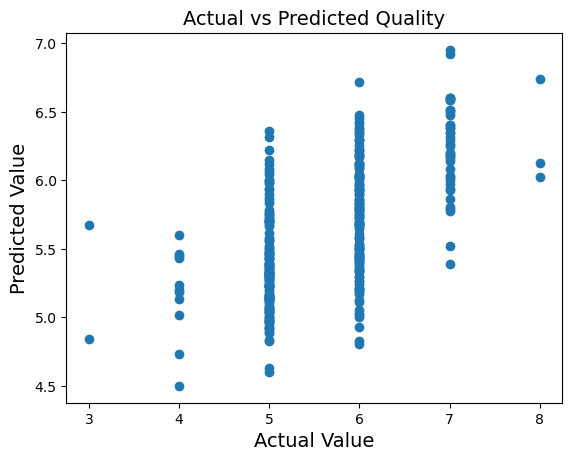

In [18]:
#Actual - Predicted plot
fig, ax = plt.subplots()
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Actual vs Predicted Quality')
plt.scatter(y_test, final_predictions)
plt.show()

From the plot we see that the model's predictions divert from the actual values, although Mean Absolute Percentage Error is just below 10%.

Perform 10-fold cross validation and compute the mean and standard deviation of the scores.

In [22]:
from sklearn.model_selection import cross_val_score

#Perform 10-fold cross validation
lin_rmses = cross_val_score(model, wine, wine_labels, scoring="r2", cv=10)
validation_stats = pd.Series(lin_rmses).describe()

print(f"The mean is : {validation_stats['mean']}")
print(f"The standard deviation is : {validation_stats['std']}")  

The mean is : 0.3382312806215474
The standard deviation is : 0.07626492784066034


In [24]:
if final_r2 >= validation_stats['min'] and final_r2 <= validation_stats['max']:
    print("The model's R2-score is within the limits defined by the 10-fold cross validation.")
else:
    print("The model's R2-score is not within the limits defined by the 10-fold cross validation.")

The model's R2-score is within the limits defined by the 10-fold cross validation.
